In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import pickle

In [ ]:
import requests
links_casas = []
link_direction = 'https://casas.trovit.com.ec/index.php/cod.search_homes/type.1/what_d.santo%20domingo%20tsachilas/origin.2/rooms_min.0/bathrooms_min.0/order_by.relevance/resultsPerPage.25/isUserSearch.1/geo_id.R287808/'

for i in range(10):

    print(i)
    hmtl_text = requests.get(link_direction).text
    soup1 = BeautifulSoup(hmtl_text, 'lxml')
    
    link_casa = soup1.find_all('div', class_="snippet-content")
    for values in link_casa:
        casa = values.find(class_='rd-link')['href']
        links_casas.append(casa)
     
    button_next = soup1.find_all('a', class_="trovit-button no-background next")
    for v in button_next:
        if v.text == 'Siguiente »':
            link_next = v.get('href')
    print(link_direction)
    print(link_next) 
    if link_direction != link_next:  
        link_direction = link_next  
    else:
        break

        
    

In [28]:
with open("links_casas_sto", "wb") as fp:   #Pickling
    pickle.dump(links_casas, fp)

In [2]:
with open("links_casas_sto", "rb") as fp:   # Unpickling
    link_casas = pickle.load(fp)
len(link_casas)

281

In [ ]:
vivienda = {'Latitud':[],'Longitud':[],'Precio':[],' Tipo de anuncio ':[], ' Tipo de propiedad ':[], ' Habitaciones ':[], 
            ' Baños ':[], ' Medio baño ':[],' Superficie ':[], ' Superficie del terreno ':[],
            ' Año de construcción ':[], ' Amueblado ':[],'Visibilidad':[]}


def extraccion(link, index):
    print(index)
    hmtl_text = requests.get(link).text
    soup = BeautifulSoup(hmtl_text, 'lxml')
    direccion = soup.find_all('div', id="map")
    precio = soup.find_all('div', class_="amount")
    keys  = soup.find_all('div', class_="amenity-key")
    values = soup.find_all('div', class_="amenity-value")

    keys_list = [val.text for val in keys]
    values_list = [val.text for val in values]
    
    for n in precio:
        precio_str = n.text
        precio_str_cleaned = precio_str.replace('$', '').replace('.', '')  # Remove the dollar sign and thousands separator
        try:
            precio_int = int(precio_str_cleaned)
            keys_list.append('Precio')
            values_list.append(precio_int)
            break
        except ValueError:
            print(f"Warning: Invalid price format - {precio_str}. Skipping...")
            break
    
    for val in direccion:
        latitude = val.get('data-latitude')
        longitude = val.get('data-longitude')
        visibilidad = val.get('data-visibility')
        longitude_float = float(longitude.replace(",", "."))
        latitude_float = float(latitude.replace(",", "."))
        keys_list.extend(('Latitud','Longitud','Visibilidad'))
        values_list.extend((latitude_float,longitude_float, visibilidad))
    
    for key, value in zip(keys_list, values_list):
        if key in vivienda:
            if key == ' Superficie ' or key == ' Superficie del terreno ':
                super_float = float(value.replace("m²", "").replace(".", "").replace(",", "."))
                vivienda[key].append(super_float)    
            elif key == ' Año de construcción 'or key == ' Medio baño ' or key == ' Baños ' or key == ' Habitaciones ':
                vivienda[key].append(int(value))
            else:
                vivienda[key].append(value)
        
    missing_element = list(set(vivienda.keys()) - set(keys_list) )
    for v in missing_element:
        if v in vivienda:
            vivienda[v].append(None)
            
for index, link in enumerate(link_casas[140:200], start=1):
    extraccion(link, index)
    
df = pd.DataFrame(vivienda)
df
#falta del 140 al 200

In [18]:
link_casas[134]

'https://rd.clk.thribee.com/id.16Z1oTdMmp/origin.2/section.1/section_type.1/country.ec/vertical.homes/iuid.14285trovit-web-5cc466b477-bmp6c65b7e0daa91ab/tracking/what_d.santo%20domingo%20tsachilas/type.1/page.5/cookieid.102115765b7e0daa7ca60.56548969/pos.15/'

In [4]:
df.to_csv('140_200', sep=',', index=False, encoding='utf-8')

In [5]:
df1 = pd.read_csv('0_70')
df2 = pd.read_csv('70_140')
df3 = pd.read_csv('140_200')
df4 = pd.read_csv('200_281')

In [7]:
result = pd.concat([df1,df2,df3,df4], ignore_index=True, sort=False)
result.to_csv('281', sep=',', index=False, encoding='utf-8')

In [2]:
df = pd.read_csv('281')

In [34]:
df

,Latitud,Longitud,Precio,Tipo de anuncio,Tipo de propiedad,Habitaciones,Baños,Medio baño,Superficie,Superficie del terreno,Año de construcción,Amueblado,Visibilidad
0,-0.225590,-79.173762,135000.0,Venta,Casa,4.0,4.0,NaN,170.0,165.0,2023.0,Sí,accurate
1,-0.258068,-79.137836,125000.0,Venta,Casa,4.0,3.0,1.0,150.0,231.0,2023.0,Sí,accurate
2,-0.257768,-79.138265,129000.0,Venta,Casa,4.0,3.0,1.0,185.0,152.0,2023.0,Sí,accurate
3,-0.222449,-79.172407,149000.0,Venta,Casa,6.0,5.0,1.0,260.0,200.0,2022.0,Sí,accurate
4,-0.222449,-79.172407,125000.0,Venta,Casa,5.0,5.0,NaN,160.0,200.0,2023.0,Sí,accurate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.256000,-79.176000,320000.0,Venta,Casa,10.0,10.0,NaN,300.0,300.0,2014.0,NaN,accurate
277,-0.261000,-79.184000,320000.0,Venta,Casa,3.0,3.0,3.0,700.0,160.0,2008.0,NaN,accurate
278,-0.248000,-79.175000,130000.0,Venta,Casa,10.0,4.0,NaN,360.0,360.0,2018.0,NaN,accurate
279,-0.255082,-79.192438,420000.0,Venta,Casa,6.0,4.0,3.0,650.0,390.0,2008.0,NaN,approximate


<Axes: xlabel='Longitud', ylabel='Latitud'>

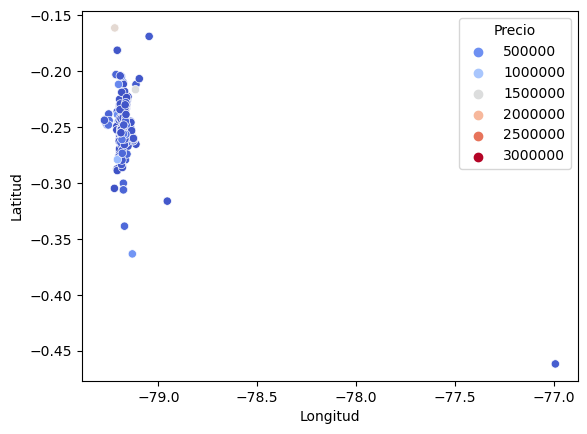

In [9]:
sns.scatterplot(x='Longitud', y='Latitud', data=df, hue = 'Precio', palette = 'coolwarm')


In [27]:
Data_1 = df[df['Precio'] < 150000].copy()

# Printing the new DataFrame
Data_1

,Latitud,Longitud,Precio,Tipo de anuncio,Tipo de propiedad,Habitaciones,Baños,Medio baño,Superficie,Superficie del terreno,Año de construcción,Amueblado,Visibilidad
0,-0.225590,-79.173762,135000.0,Venta,Casa,4.0,4.0,NaN,170.0,165.0,2023.0,Sí,accurate
1,-0.258068,-79.137836,125000.0,Venta,Casa,4.0,3.0,1.0,150.0,231.0,2023.0,Sí,accurate
2,-0.257768,-79.138265,129000.0,Venta,Casa,4.0,3.0,1.0,185.0,152.0,2023.0,Sí,accurate
3,-0.222449,-79.172407,149000.0,Venta,Casa,6.0,5.0,1.0,260.0,200.0,2022.0,Sí,accurate
4,-0.222449,-79.172407,125000.0,Venta,Casa,5.0,5.0,NaN,160.0,200.0,2023.0,Sí,accurate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,-0.227984,-79.164774,135000.0,Venta,Casa,3.0,4.0,NaN,245.0,245.0,2014.0,NaN,approximate
274,-0.252188,-79.187938,68000.0,Venta,Casa,3.0,2.0,2.0,250.0,250.0,2017.0,NaN,accurate
275,-0.230000,-79.168000,85000.0,Venta,Casa,4.0,2.0,NaN,240.0,240.0,2014.0,NaN,accurate
278,-0.248000,-79.175000,130000.0,Venta,Casa,10.0,4.0,NaN,360.0,360.0,2018.0,NaN,accurate


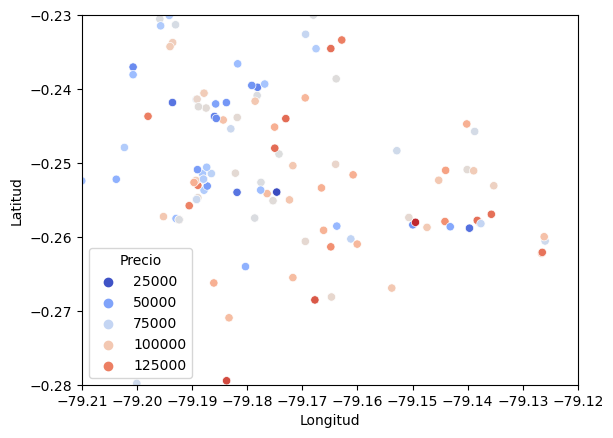

In [82]:
import matplotlib.pyplot as plt
plot = sns.scatterplot(x='Longitud', y='Latitud', data=Data_1, hue='Precio', palette='coolwarm')

# Setting limits for the x and y axes
plt.xlim(-79.21,-79.12 )  # set limit for x-axis
plt.ylim(-0.28, -0.23)  # set limit for y-axis

plt.show()

In [90]:
Data_2 = Data[Data[' Año de construcción '] > 1980].copy()

# Printing the new DataFrame
Data_2

,Latitud,Longitud,Precio,Tipo de anuncio,Tipo de propiedad,Habitaciones,Baños,Medio baño,Superficie,Superficie del terreno,Año de construcción,Amueblado,Visibilidad
0,-0.225590,-79.173762,135000.0,Venta,Casa,4.0,4.0,NaN,170.0,165.0,2023.0,Sí,accurate
1,-0.258068,-79.137836,125000.0,Venta,Casa,4.0,3.0,1.0,150.0,231.0,2023.0,Sí,accurate
2,-0.257768,-79.138265,129000.0,Venta,Casa,4.0,3.0,1.0,185.0,152.0,2023.0,Sí,accurate
3,-0.222449,-79.172407,149000.0,Venta,Casa,6.0,5.0,1.0,260.0,200.0,2022.0,Sí,accurate
4,-0.222449,-79.172407,125000.0,Venta,Casa,5.0,5.0,NaN,160.0,200.0,2023.0,Sí,accurate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,-0.230000,-79.168000,85000.0,Venta,Casa,4.0,2.0,NaN,240.0,240.0,2014.0,NaN,accurate
216,-0.256000,-79.176000,320000.0,Venta,Casa,10.0,10.0,NaN,300.0,300.0,2014.0,NaN,accurate
217,-0.261000,-79.184000,320000.0,Venta,Casa,3.0,3.0,3.0,700.0,160.0,2008.0,NaN,accurate
218,-0.248000,-79.175000,130000.0,Venta,Casa,10.0,4.0,NaN,360.0,360.0,2018.0,NaN,accurate


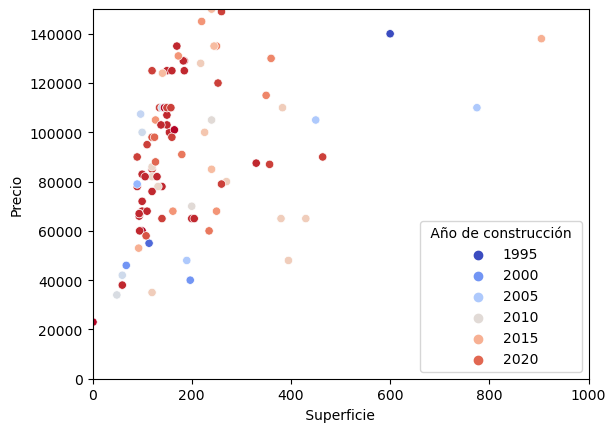

In [91]:
plot = sns.scatterplot(x=' Superficie ', y='Precio', data=Data_2, hue=' Año de construcción ' , palette = 'coolwarm')
# Setting limits for the x and y axes
plt.xlim(0,1000 )  # set limit for x-axis
plt.ylim(0, 150000)  # set limit for y-axis

plt.show()

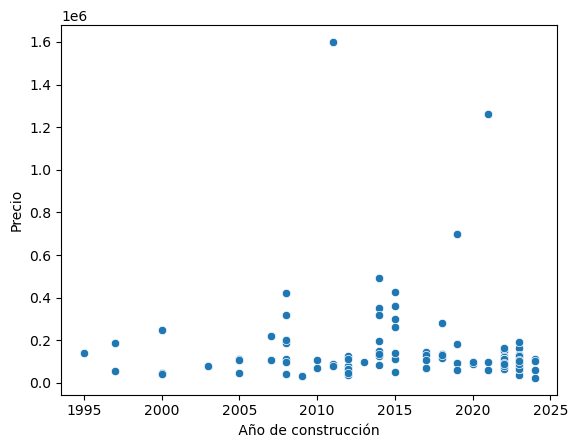

In [94]:
plot = sns.scatterplot(x=' Año de construcción ', y='Precio', data=Data_2)
plt.show()

<Axes: >

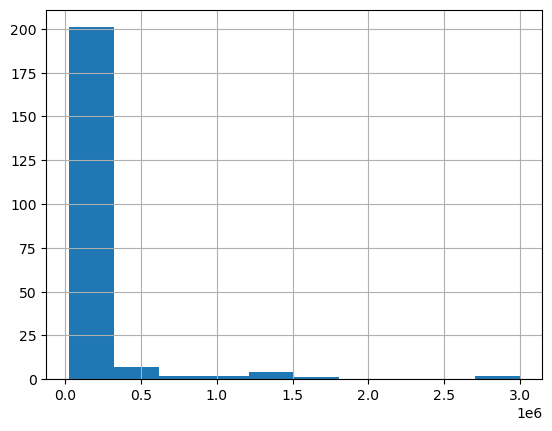

In [95]:
Data['Precio'].hist()

In [4]:
import geopandas as gpd


In [16]:
district = gpd.read_file(r'C:\Users\Brian\Desktop\Vivienda sto\mygeodata\map\roads-line.shp')


In [17]:
district

,osm_id,highway,surface,name,ref,oneway,bridge,layer,covered,access,...,lit,sidewalk,noname,check_date,motor_vehi,cycleway_l,bike_ride,segregated,turn_lan_1,geometry
0,122176398,residential,asphalt,Entrada a la Cadena,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.17380 -0.27789, -79.17377 -0.2..."
1,122175506,residential,unpaved,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.17453 -0.28298, -79.17450 -0.2..."
2,889531997,residential,unpaved,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.17477 -0.28011, -79.17459 -0.2..."
3,122176581,residential,unpaved,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.17555 -0.27947, -79.17504 -0.2..."
4,122175513,residential,unpaved,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.17288 -0.27838, -79.17319 -0.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,889139824,residential,unpaved,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.12381 -0.25719, -79.12283 -0.2..."
1505,889139848,residential,unpaved,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.12275 -0.25496, -79.12341 -0.2..."
1506,392835780,residential,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.12263 -0.25467, -79.12316 -0.2..."
1507,392835781,residential,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-79.12425 -0.25355, -79.12346 -0.2..."


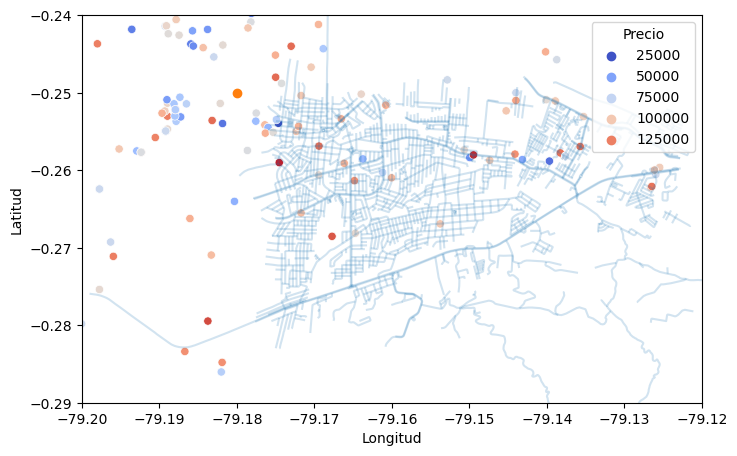

In [33]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,10))
sns.scatterplot(x='Longitud', y='Latitud', data=Data_1, hue='Precio', palette='coolwarm')
district.plot(ax=ax, alpha=0.2)
plt.xlim(-79.2,-79.12 )  # set limit for x-axis
plt.ylim(-0.29, -0.24)  # set limit for y-axis
plt.scatter(-79.18,-0.25)
plt.savefig('Stodomn.png')  
plt.show() 